In [1]:
# Import dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

Once we have our required libraries imported into our notebook, we can create the dummy data using Scikit-learn's make_blobs method. The make_blobs is used to create sample values and contains many parameters that change the shape and values of the sample dataset. For our purposes, we'll use the make_blobs method to create 1,000 samples with two features (also known as our x- and y-axis values) that are linearly separable into two groups. In our notebook, we can generate and visualize our dummy data using the following code:

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

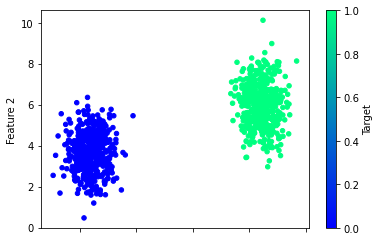

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

Once we have our dummy data generated, we'll split our data into training and test datasets using Scikit-learn's train_test_split method. In our notebook, enter the following code to generate the training and test datasets:

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

Now that we have our training data, we need to prepare the dataset for our neural network model. As with any machine learning algorithm, it is crucial to normalize or standardize our numerical variables to ensure that our neural network does not focus on outliers and can apply proper weights to each input. In most cases, the more that input variables are normalized to the same scale, the more stable the neural network model is, and the better the neural network model will generalize. To normalize our dummy data, we'll add and run the following code to the notebook:

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

IMPORTANT
Don't worry if you do not understand what these normalization functions do—we'll cover preprocessing in greater depth later in this module.

Finally, we have our data ready for our first neural network model! To create the neural network in our notebook, first we must create our Sequential model. To do this, we must add the following code to the notebook:

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

The nn_model object will store the entire architecture of our neural network model. Our next step is to add our first layer, which will contain our inputs and a hidden layer of neurons.

IMPORTANT
The Keras module does not have specific classes for input, hidden, and output layers. All layers are built using the Dense class, and the input and first hidden layer are always built in the same instance.

As we learned earlier, we can add layers to our Sequential model using Keras' Dense class. For our first layer, we need to define a few parameters:

- The input_dim parameter indicates how many inputs will be in the model (in this case two).
- The units parameter indicates how many neurons we want in the hidden layer (in this case one).
- The activation parameter indicates which activation function to use. We'll use the ReLU activation function to allow our hidden layer to identify and train on nonlinear relationships in the dataset.

Putting it all together, our first Dense layer should have the following Python code:

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

NOTE
Defining an activation function as part of the first layer is suggested but not required. By default, a Dense layer will look for linear relationships.

Now that we have our input and hidden layers built, we need to add an output layer.

Once again, we'll use the Dense class to tell our Sequential model what to do with the data. This time, we only need to supply the number of output neurons. For a classification model, we only want a yes or no binary decision; therefore, we only need one output neuron. In our previous layer, we used a ReLU activation function to enable nonlinear relationships; however, for our classification output, we want to use a sigmoid activation function to produce a probability output. Let's add the following code to our notebooks:

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

Now that we have added our layers to the Sequential model, we can double-check our model structure using the summary method. Try running the following code in your notebook:

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


NOTE
Note that the number of parameters in each layer does not equal the number of neurons we defined in the notebook. Remember, every layer has one additional input known as our bias term (or weighted constant).

Now that we have our layers defined, we have to inform the model how it should train using the input data. The process of informing the model how it should learn and train is called compiling the model.

Depending on the function of the neural network, we'll have to compile the neural network using a specific optimization function and loss metric. The optimization function shapes and molds a neural network model while it is being trained to ensure that it performs to the best of its ability. The loss metric is used by machine learning algorithms to score the performance of the model through each iteration and epoch by evaluating the inaccuracy of a single input. To enhance the performance of our classification neural network, we'll use the adam optimizer, which uses a gradient descent approach to ensure that the algorithm will not get stuck on weaker classifying variables and features. As for the loss function, we'll use binary_crossentropy, which is specifically designed to evaluate a binary classification model.

IMPORTANT
There are many types of optimization functions and loss metrics you may use in neural networks. We'll discuss and use a few in this module, but feel free to check out the Keras documentation for the full list of options.

In addition to the optimization function and loss metric, we'll also add a more reader-friendly evaluation metric, which measures the quality of the machine learning model. There are two main types of evaluation metrics—the model predictive accuracy and model mean squared error (MSE). We use accuracy for classification models and msefor regression models. For model predictive accuracy, the higher the number the better, whereas for regression models, MSE should reduce to zero.

Putting all of these metrics together, we'll add and run the following code to our notebooks:

In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

At last, our Sequential neural network is modeled and compiled, so now we can move onto training/fitting our model to the dummy data. To train/fit our Keras model, we'll use the fit method and provide the x training values and y training values, as well as the number of epochs. Each epoch is a complete pass through the training data. As we tested earlier in the TensorFlow Playground, the neural network binary classification model reached optimal performance at around 100 epochs. Since we designed our Sequential model to match the TensorFlow Playground simulation, we should expect similar performance. To our notebooks, we'll add and run the following code:

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 0.6904 - accuracy: 0.4787
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.9653
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6700 - accuracy: 0.9667
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6584 - accuracy: 0.9680
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6459 - accuracy: 0.9707
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6325 - accuracy: 0.9747
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6185 - accuracy: 0.9747
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6040 - accuracy: 0.9773
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5891 - accuracy: 0.9773
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5741 - accuracy: 0.9787
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.1059 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 969us/step - loss: 0.1040 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1022 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1005 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0987 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0971 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0954 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0938 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0922 - accuracy: 1.0000
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0907 - accuracy: 1.0000
Epoch 93/10

Looking at the model training output, we know that the loss metric was 0.07 and the predictive accuracy is 1.0. This means that although our model performance had more loss than the simulation data, the model correctly classifies all of our training data, which is sufficient for our needs. Note that the model isn't seeded, meaning that the results in your notebook will likely not be identical to one in this example. However, you should observe similar general trends.

Under the hood, the neural network will select random weights to start training the model, so that each and every time we create a neural network, the model will be different. However, due to the adam optimizer, our model's end performance should be very similar, regardless of the loss function.

When training completes, the model object stores the loss and accuracy metrics across all epochs, which we can use to visualize the training progress. For example, if we wanted to visualize our model's loss over the full 100 epochs, we can run the following code in our notebooks:

<AxesSubplot:>

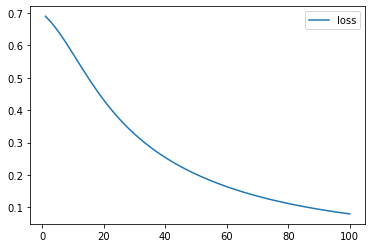

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

Similarly, we can plot the accuracy over time using the same DataFrame:

<AxesSubplot:>

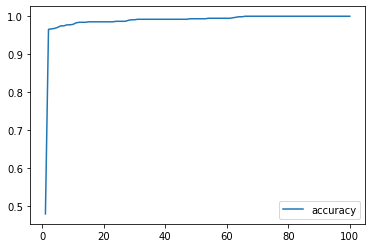

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

Remember, our neural network consisted of a single hidden layer with one neuron—if we were to increase the number of neurons in the hidden layer, the neural network would have been able to fit the training data even faster!

Now that our model has been properly trained, we must evaluate model performance using the test data. Testing a neural network model in TensorFlow is very similar to testing a machine learning model in Scikit-learn. For our purposes, we'll use the evaluate method and print the testing loss and accuracy values. In our notebooks, we'll add and run the following code:

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0736 - accuracy: 1.0000 - 151ms/epoch - 19ms/step
Loss: 0.07356343418359756, Accuracy: 1.0


Looking at the performance metrics from the model, the neural network was able to correctly classify each of the points in the test data. In other words, the model was able to correctly classify data it was not trained on 100% of the time. Although perfect model performance is ideal, more complex datasets and models may not be able to achieve 100% accuracy. Therefore, it is important to establish model performance thresholds before designing any machine learning model. Depending on the type of data and the use case, we may have to recreate and retrain a model using different parameters, different training/test data, or even look to use a different model entirely.

Now that we have a trained neural network model and we have verified its performance using a test dataset, we can apply this model to novel datasets and predict the classification of a data point. In our Sequential model, we can use the predict method to generate predictions on new data. For example, if we wanted to predict the class of a new blob dataset, we can add and run the following code:

In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 74ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

Now that we have designed a basic single-neuron, single-layer model, trained the model, and evaluated its performance using a test dataset, we are ready to start testing the limits of the basic neural network. As previously mentioned, simple linear regression and singular perceptron models work really well as a binary classifier when the data is linearly separable. But what about nonlinear data? How does our basic neural network model behave when data becomes more complicated?

To test this behavior, let's generate some new dummy data. This time we'll generate some nonlinear moon-shaped data using Scikit-learn's make_moons method and visualize it using Pandas and Matplotlib. Using the same notebook, we'll add and run the following code:

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

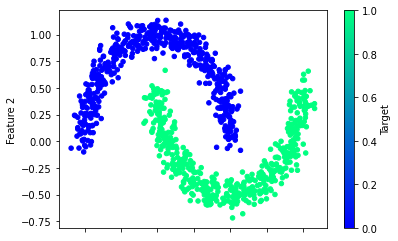

In [15]:
# Import Scikit-learn's make_moons method
from sklearn.datasets import make_moons

# Visualize it using Pandas and Matplotlib
# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

Since we are not changing the structure of our neural network, nor are we changing its function, we can use the same Sequential model object. The only difference from our previous workflow is this time we will retrain and evaluate on the nonlinear moon-shaped data.

As with our previous dummy data example, we need to split our nonlinear data into training and testing datasets and normalize our datasets. In the same notebook, we'll add and run the following code:

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

Just as we did with the linear data, we'll train our neural network model using the fit method on the nonlinear training data. Let's add and run the following code to our notebooks:

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.2480 - accuracy: 0.4013
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1078 - accuracy: 0.4227
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0151 - accuracy: 0.4400
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9537 - accuracy: 0.4533
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9095 - accuracy: 0.4667
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8773 - accuracy: 0.4773
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8518 - accuracy: 0.4947
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8298 - accuracy: 0.5067
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8113 - accuracy: 0.5227
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7950 - accuracy: 0.5307
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.4848 - accuracy: 0.7293
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4822 - accuracy: 0.7307
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4795 - accuracy: 0.7333
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4769 - accuracy: 0.7347
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4743 - accuracy: 0.7413
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4716 - accuracy: 0.7373
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4689 - accuracy: 0.7400
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4662 - accuracy: 0.7400
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4634 - accuracy: 0.7440
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4607 - accuracy: 0.7480
Epoch 93/100


In our example, TensorFlow stopped training the model after 84 epochs because the loss metric was no longer decreasing at a substantial rate, and the accuracy was not improving.

Let's plot out the loss and accuracy curves over our training iterations. Again, we'll add and run the following code to the notebook:

<AxesSubplot:>

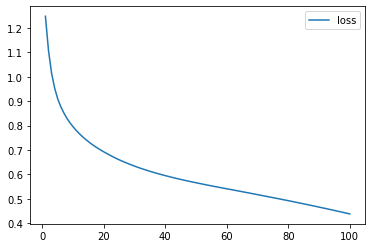

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

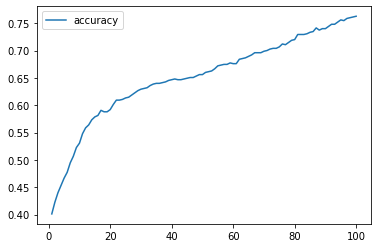

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")

According to the accuracy metric, the basic single-neuron, single-layer neural network model was only able to correctly classify 89% of all data points in the nonlinear training data. Depending on a person's use case, 89% accuracy could be sufficient for a first-pass model. For example, if we were trying to use a neural network model to separate left-handed people from right-handed people, a model that is correct 89% of the time is very accurate, and guessing incorrectly does not have a huge negative impact.

However, in many industrial and medical use cases, a model's classification accuracy must exceed 95% or even 99%. In these cases, we wouldn't be satisfied with the basic single-neuron, single-layer neural network model, and we would have to design a more robust neural network. In summary, the more complicated and nonlinear the dataset, the more components we'd need to add to a neural network to achieve our desired performance.

Earlier in the module, we learned that adding neurons to a neural network can help to generate a well-performing model faster than using a single-neuron, single-layer neural network. In fact, there are multiple advantages to adding neurons to our hidden layer in a neural network. Some of the advantages follow:

+ There is a distributed effort to find optimal weights—faster.
+ Each neuron can focus on different features to identify nonlinear effects—smarter.
+ It is less likely to fixate on complex variables—more robust.

So, if adding more neurons to our neural network model increases the performance, why wouldn't we always use the maximum number of neurons? There are two main reasons to limit the number of neurons in a neural network model: overfitting and computation resources. Similar to other machine learning algorithms, neural networks are susceptible to overfitting where the model fits the training data too well. As a result of overfitting, the neural network will not generalize well and won't be able to classify new data correctly. Additionally, a neural network model with a large number of neurons requires equally large training dataset—training a large neural network requires more data, more epochs, and more time. Therefore, it is important that a neural network model has an appropriate number of neurons to match the size of the data, the complexity of the problem, and the amount of input neurons.

IMPORTANT
A good rule of thumb for a basic neural network is to have two to three times the amount of neurons in the hidden layer as the number of inputs.

Since our blob and moon-shaped dummy datasets are created using two variables, our neural network model uses two input values.

Applying the neuron rule of thumb, we should use a neural network model with six neurons in the hidden layer to properly model our linear and nonlinear datasets. Thankfully, designing a neural network with more layers is the exact same workflow as before, except we tweak a few parameters.

Since we want to change the structure of our neural network model, we must first create a new Sequential model by adding the following code to our notebook and running it:

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

Using our new Sequential model, we'll add our input, hidden, and output layers using the Dense class. However, this time we'll create a hidden layer with six neurons instead of one by changing the units parameter while keeping all other parameters the same. To our notebooks, we'll add and run the following code:

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

Now that our new Sequential model is defined, we need to compile and train the model using our nonlinear moon-shaped dummy data. For us to make direct comparisons with our single-neuron model, we'll use the same training parameters, including loss metric, optimizer function, and number of epochs.

Again, we'll add and run the following code to our notebooks:

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.3499 - accuracy: 0.2000
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 1.2422 - accuracy: 0.2107
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1425 - accuracy: 0.2200
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0497 - accuracy: 0.2440
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9664 - accuracy: 0.2747
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8958 - accuracy: 0.2880
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8333 - accuracy: 0.3213
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7802 - accuracy: 0.3400
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7365 - accuracy: 0.3507
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6989 - accuracy: 0.3760
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.2506 - accuracy: 0.8973
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2497 - accuracy: 0.8973
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2488 - accuracy: 0.8973
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2480 - accuracy: 0.8973
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2472 - accuracy: 0.8973
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2465 - accuracy: 0.8973
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2458 - accuracy: 0.8973
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2451 - accuracy: 0.8973
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2444 - accuracy: 0.8973
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2438 - accuracy: 0.8973
Epoch 93/100


Looking at the training metrics of our new model, as we increase the number of neurons within the hidden layer, the classification accuracy improves. You may have noticed that adding multiple neurons to our neural network did not yield a perfect classification model. As input data becomes more complex, neural networks will require more and more optimization tweaks to achieve their desired accuracy.

As with all machine learning algorithms, neural networks are not perfect and will often underperform using a basic implementation. When a neural network model does not meet performance expectations, it is usually due to one of two causes: inadequate or inappropriate model design for a given dataset, or insufficient or ineffective training data. Although collecting more training/test data is almost always beneficial, it may be impossible due to budget or logistical limitations. Therefore, the most straightforward means of improving neural network performance is tweaking the model design and parameters.

When it comes to tweaking a neural network model, a little can go a long way. If we tweak too many design aspects and parameters at once, we can cause a model to become less effective without a means of understanding why. To avoid trapping ourselves in endless optimization iterations, we can use characteristics of our input data to determine what parameters should be changed.

There are a few means of optimizing a neural network:

+ Check out your input dataset.
+ Add more neurons to a hidden layer.
+ Add additional hidden layers.
+ Use a different activation function for the hidden layers.
+ Add additional epochs to the training regimen.

Check Out Your Input Dataset
Before you start down the endless journey of model optimization, it is always a good idea to check the input data and ensure that there are no variables or set of outliers that are causing the model to be confused. Although neural networks are tolerant of noisy characteristics in a dataset, neural networks can learn bad habits (like the brain does). Even if we standardize and scale our numerical variables, too many outliers in a single variable can lead to performance issues.

REWIND
Previously, we explored how to optimize a neural network by adding neurons to the hidden layer. Adding neurons to a hidden layer has diminishing returns—more neurons means more data as well as a risk to overfitting the model.

Add More Neurons and Hidden Layers
Instead of adding more neurons, we could change the structure of the model by adding additional hidden layers, which allows neurons to train on activated input values, instead of looking at new training data. Therefore, a neural network with multiple layers can identify nonlinear characteristics of the input data without requiring more input data.

IMPORTANT
This concept of a multiple-layered neural network is known as a deep learning neural network.

Use a Different Activation Function
Another strategy to increase performance of a neural network is to change the activation function used across hidden layers. Depending on the shape and dimensionality of the input data, one activation function may focus on specific characteristics of the input values, while another activation function may focus on others.

It is important to use an activation function that matches the complexity of the input data. If we wanted to rank the four most-used activation functions by data complexity and ideal use case, the order would be as follows:

+ The sigmoid function values are normalized to a probability between 0 and 1, which is ideal for binary classification.
+ The tanh function can be used for classification or regression, and it expands the range between -1 and 1.
+ The ReLU function is ideal for looking at positive nonlinear input data for classification or regression.
+ The Leaky ReLU function is a good alternative for nonlinear input data with many negative inputs.

NOTE
By default, the Keras Dense layer will implement the linear activation function, which means that the net sum value is not transformed. In other words:

sigma(x) = x

The linear activation function limits the neural network model to only perform a linear regression. Therefore, the linear activation function is only appropriate for an output layer.

To experiment and optimize using an activation function, try selecting from activation functions that are slightly more complex than your current activation function. For example, if you were trying to build a regression neural network model using a wide input dataset, you might start with a tanh activation function. To optimize the regression model, try training with the ReLU activation function, or even the Leaky ReLU activation function. In most cases, it is better to try optimizing using a higher complexity activation function rather than a lower complexity activation function. Using a higher complexity activation function will assess the input data differently without any risk of censoring or ignoring lower complexity features.

Add Additional Epochs to Training Regimen
If your model still requires optimizations and tweaking to meet desired performance, you can increase the number of epochs, or training iterations. As the number of epochs increases, so does the amount of information provided to each neuron. By providing each neuron more information from the input data, the neurons are more likely to apply more effective weight coefficients. Adding more epochs to the training parameters is not a perfect solution—if the model produces weight coefficients that are too effective, there is an increased risk of model overfitting. Therefore, models should be tested and evaluated each time the number of epochs are increased to reduce the risk of overfitting.

As with all machine learning models, creating an ideal classification or regression model is part mathematics and part art. As we design more and more models, optimizing and fine-tuning becomes less trial and error and more pattern recognition.